In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

%matplotlib inline


In [2]:
sns.set_style('whitegrid')
data = sns.load_dataset('tips')

data.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
#! pip install seaborn==0.9.0

# Scatterplot

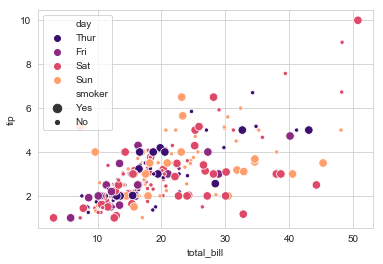

In [3]:
sns.scatterplot(x="total_bill", y="tip",hue="day", size="smoker",palette="magma",data=data)

# Lineplot

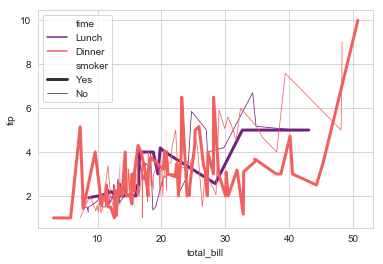

In [12]:
sns.lineplot(x="total_bill", y="tip",hue="time", size="smoker",palette="magma",data=data)

# Distplot

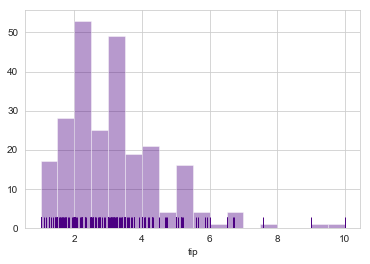

In [4]:
#sns.set_style('white')
sns.distplot(data.tip, kde = False , rug = True ,color = 'indigo' ,norm_hist = False)

# JointPlot

/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/rohan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


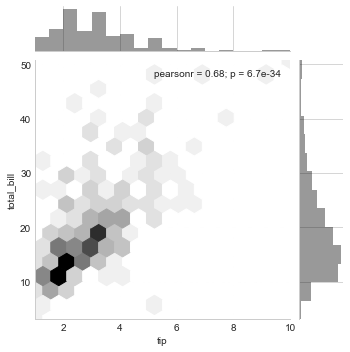

In [47]:
sns.jointplot(x = 'tip',y = 'total_bill',data =  data, kind = 'hex', size =5 , color = 'black')
#sns.jointplot(x = 'tip',y = 'total_bill',data =  data, kind = 'kde', size =5 , color = 'black')

# Stripplot

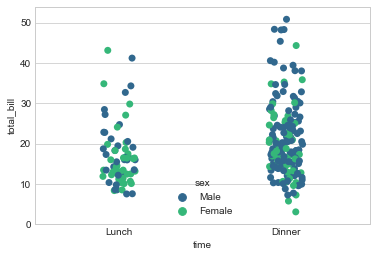

In [48]:
sns.stripplot(x = 'time',y = 'total_bill',data =  data,jitter= True , hue = 'sex', palette= 'viridis' , size =7)

# PairPlot

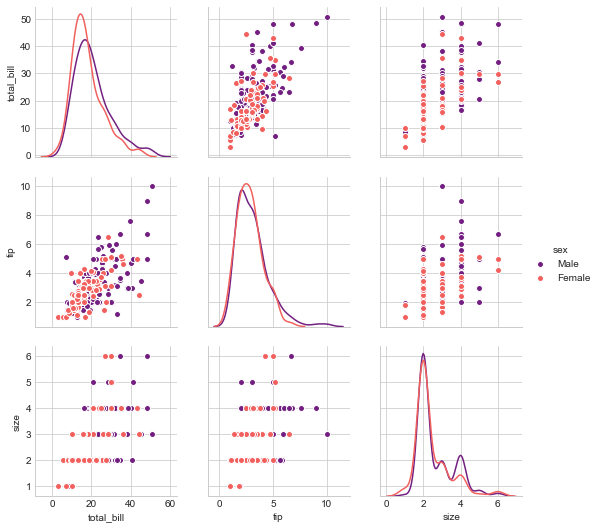

In [49]:
sns.pairplot(data, hue = 'sex' , palette= 'magma',diag_kind= 'kde')

### using numerical value for hue 

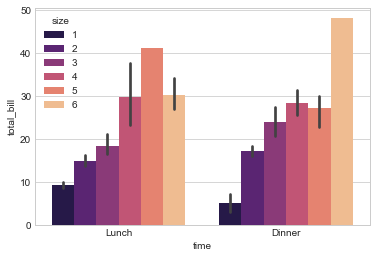

In [50]:
sns.barplot(x = 'time' , y = 'total_bill' , data = data , orient = "v",hue = 'size', palette= 'magma')

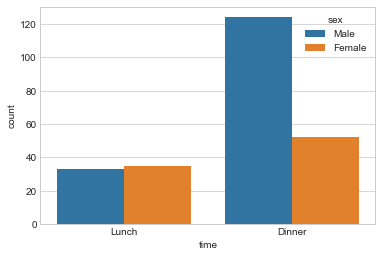

In [51]:
sns.countplot(x='time',data=data,hue = 'sex')

# Violin and boxplot

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

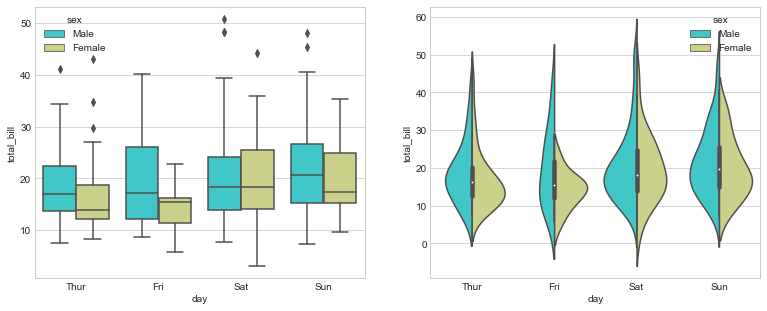

In [52]:
plt.figure(figsize= (13,5))
plt.subplot(121)
sns.boxplot(x = 'day', y = 'total_bill' , data = data , hue = 'sex', palette='rainbow', orient= 'v')

plt.subplot(122)
sns.violinplot(x = 'day', y = 'total_bill' , data = data , hue = 'sex', palette='rainbow', orient= 'v', split= True)

# Column plotting 

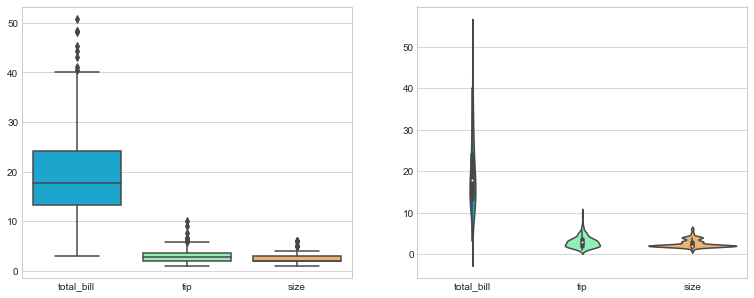

In [53]:
plt.figure(figsize= (13,5))
plt.subplot(121)
sns.boxplot( data = data , palette='rainbow', orient= 'v')

plt.subplot(122)
sns.violinplot(data = data , palette='rainbow', orient= 'v' )

# Strip and Swarm plot



The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

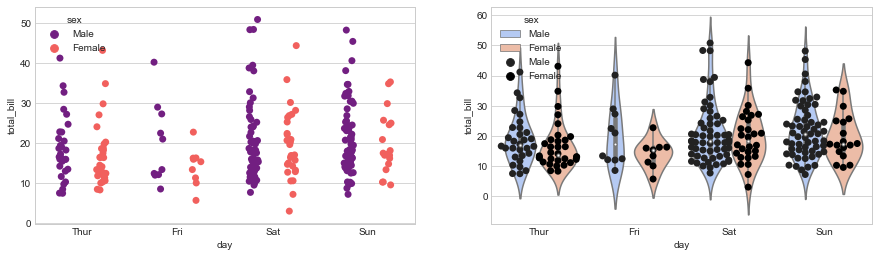

In [54]:
fig, [ax1, ax2] = plt.subplots(1,2,figsize = (15,4))

sns.stripplot(x = 'day', y = 'total_bill' , data = data,hue = 'sex', palette= 'magma',jitter = True, size= 7 , dodge= True, ax = ax1)


sns.swarmplot(x = 'day', y = 'total_bill' , data = data,hue = 'sex' ,dodge= True,size= 7 , ax = ax2, color= 'black')
sns.violinplot(x = 'day', y = 'total_bill' , data = data,hue = 'sex',dodge= True, palette= 'coolwarm' ,size= 7 , ax = ax2)

# Heat Maps

In [15]:
dc = data.corr()

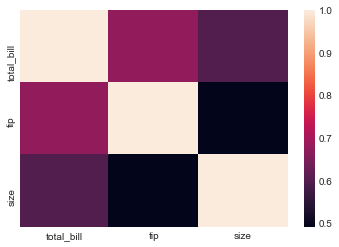

In [55]:
sns.heatmap(dc)

In [25]:
dat = sns.load_dataset('flights')
print(dat.year.unique())
dat.head()

[1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960]


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [29]:
dp = pd.pivot_table(data =dat, values = 'passengers', index = 'month', columns= 'year')
dp.head(2)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391


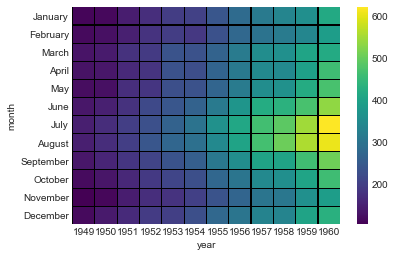

In [56]:
sns.heatmap(dp,cmap= 'viridis',annot= False,linewidths= 0.1, linecolor= 'black')

# regplot vs lmplot

The regplot() and lmplot() functions are closely related, but the former is an axes-level function while the latter is a figure-level function that combines regplot() and FacetGrid.

It’s also easy to combine combine regplot() and JointGrid or PairGrid through the jointplot() and pairplot() functions, although these do not directly accept all of regplot()’s parameters.

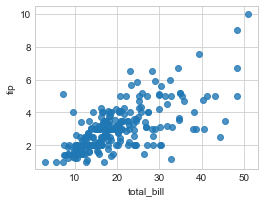

In [31]:
plt.figure(figsize=(4,3))
sns.regplot(x="total_bill", y="tip", data=data,fit_reg= False)

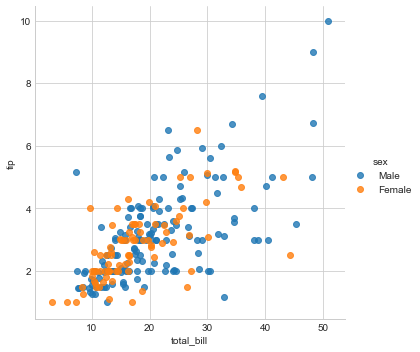

In [39]:
sns.lmplot(x="total_bill", y="tip", data=data,hue = 'sex',fit_reg= False)

# Facetgrid

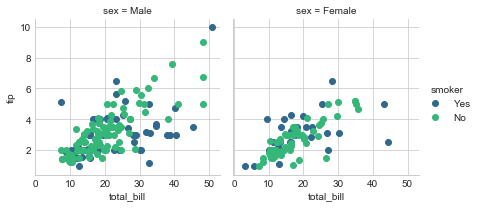

In [5]:
g = sns.FacetGrid(data,hue = 'smoker',col = 'sex',palette= 'viridis')
g.map(plt.scatter,'total_bill','tip')
g.add_legend()

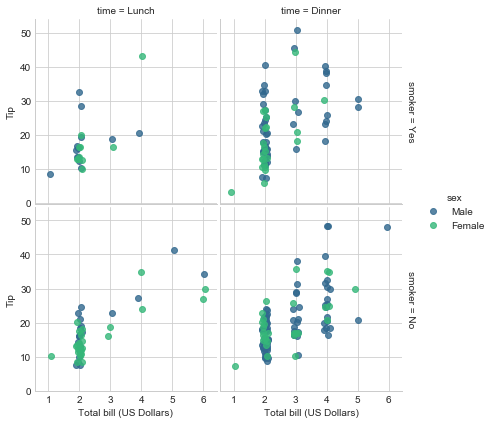

In [57]:
g = sns.FacetGrid(data, row="smoker", col="time",hue = 'sex', margin_titles=True,palette= 'viridis',size=3, aspect=1)
g.map(sns.regplot, "size", "total_bill", fit_reg=False, x_jitter=.1)

g.set_axis_labels("Total bill (US Dollars)", "Tip");
#g.set(xticks=[10, 30, 50], yticks=[2, 6, 10]);
g.fig.subplots_adjust(wspace=.02, hspace=.02)

g.add_legend()

# Clustermap !!

In [17]:
sns.jointplot.__class__

function

In [19]:
sns.FacetGrid.__class__,sns.JointGrid.__class__,sns.PairGrid.__class__

(type, type, type)

In [15]:
sns.axisgrid.__class__

module

In [20]:
sns.axisgrid.__dict__

{'__name__': 'seaborn.axisgrid',
 '__doc__': None,
 '__package__': 'seaborn',
 '__loader__': <_frozen_importlib_external.SourceFileLoader at 0x7f1b59aafcf8>,
 '__spec__': ModuleSpec(name='seaborn.axisgrid', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7f1b59aafcf8>, origin='/home/rohan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py'),
 '__file__': '/home/rohan/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py',
 '__cached__': '/home/rohan/anaconda3/lib/python3.6/site-packages/seaborn/__pycache__/axisgrid.cpython-36.pyc',
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, exceptions, and other objects.\n\nNoteworthy: None is the `nil' object; Ellipsis represents `...' in slices.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>),
  '__build_class__': <function __build_class__>,
  '__import__': <function __impo

In [24]:
dir(sns.axisgrid)

['FacetGrid',
 'Grid',
 'JointGrid',
 'LooseVersion',
 'PairGrid',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_facet_docs',
 '_freedman_diaconis_bins',
 'blend_palette',
 'color_palette',
 'dedent',
 'distplot',
 'division',
 'jointplot',
 'kdeplot',
 'mpl',
 'np',
 'pairplot',
 'pd',
 'plt',
 'product',
 'stats',
 'string_types',
 'utils',
 'warnings']

In [29]:
sns.JointGrid.__dict__

mappingproxy({'__module__': 'seaborn.axisgrid',
              '__doc__': 'Grid for drawing a bivariate plot with marginal univariate plots.',
              '__init__': <function seaborn.axisgrid.JointGrid.__init__(self, x, y, data=None, height=6, ratio=5, space=0.2, dropna=True, xlim=None, ylim=None, size=None)>,
              'plot': <function seaborn.axisgrid.JointGrid.plot(self, joint_func, marginal_func, annot_func=None)>,
              'plot_joint': <function seaborn.axisgrid.JointGrid.plot_joint(self, func, **kwargs)>,
              'plot_marginals': <function seaborn.axisgrid.JointGrid.plot_marginals(self, func, **kwargs)>,
              'annotate': <function seaborn.axisgrid.JointGrid.annotate(self, func, template=None, stat=None, loc='best', **kwargs)>,
              'set_axis_labels': <function seaborn.axisgrid.JointGrid.set_axis_labels(self, xlabel='', ylabel='', **kwargs)>,
              'savefig': <function seaborn.axisgrid.JointGrid.savefig(self, *args, **kwargs)>,
      